# Magnetized Plasma

This codes tests the magnetic integrator by reproducing results of Bernu Journal de Physique, **42** L253 (1981). This notebook can be found in the `sarkas/notebook` folder of the Github repo.

We simulate a One Component Plasma composed of $N = 500$ Hydrogen atoms at a density of $n = 1.62 \times 10^{30}$ $N/m^3$, and temperature $T = 0.3$ $eV$, which leads to $\Gamma = 100$. The system is in a constant magnetic field $B = B_0 \hat{\mathbf z}$ with $B_0 = 17 \times 10^6$ Gauss. The ratio of the cyclotron frequency to the plasma frequency is $\beta \sim 1.0$. 

This simulation is run on Dell XPS 8930 with an Intel i7-8700K and 48 Gb of RAM running Ubuntu 18.04 LTS. 

In [1]:
# Import the usual libraries
%pylab
%matplotlib inline
import os
import seaborn as sns

plt.style.use('MSUstyle')
# Import sarkas
from sarkas.processes import Simulation, PostProcess, PreProcess

# Create the file path to the YAML input file
example_directory = os.path.join('..',
                                 os.path.join('sarkas','examples'))

input_file_name = os.path.join(example_directory,  'mag_ocp_mks.yaml')

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


## PreProcessing







  _________             __                   
 /   _____/____ _______|  | _______    ______
 \_____  \\__  \\_  __ \  |/ /\__  \  /  ___/
 /        \/ __ \|  | \/    <  / __ \_\___ \ 
/_______  (____  /__|  |__|_ \(____  /____  >
        \/     \/           \/     \/     \/ 


An open-source pure-python molecular dynamics code for non-ideal plasmas.



======================= Simulation ==========================

Job ID:  ocp_mag
Job directory:  Simulations/ocp_mag
Equilibration dumps directory:  Simulations/ocp_mag/Equilibration/dumps
Production dumps directory:  Simulations/ocp_mag/Production/dumps

Units:  mks
Total No. of particles =  500

Particle Species:
No. of species =  1
Species 1 : H
	Species ID: 0
	No. of particles = 500 
	Number density = 1.620000e+30 [N/m^3]
	Mass = 1.673000e-27 [kg]
	Charge = 1.602177e-19 [C]
	Temperature = 3.163589e+03 [K]

Lengths scales:
Wigner-Seitz radius = 5.282005e-11 [m]
No. of non-zero box dimensions =  3
Box length along x axis = 1.27943


Time of a single equilibration step averaged over 100 steps: 
0 min 0 sec 39 msec 856 usec 227 nsec 




Time of a single magnetization step averaged over 100 steps: 
0 min 0 sec 35 msec 808 usec 512 nsec 




Time of a single production step averaged over 100 steps: 
0 min 0 sec 36 msec 293 usec 14 nsec 



----------------- Total Estimated Times -----------------------

Equilibration Time: 0 hrs 3 min 19 sec

Magnetization Time: 0 hrs 17 min 54 sec

Production Time: 0 hrs 30 min 14 sec

Total Run Time: 0 hrs 51 min 28 sec


===================== Post Processing ============================

Radial Distribution Function:
No. bins = 500
dr = 0.0125 a_ws = 6.5989e-13 [m]
Maximum Distance (i.e. potential.rc)= 6.2466 a_ws = 3.2995e-10 [m]

Static Structure Factor:
No. of ka harmonics = n_x, n_y, n_z = 10, 10, 10
No. of ka values to calculate = 1330
Smallest wavevector k_min = 3.9 / N^(1/3)
k_min = 0.4911 / a_ws = 1.4797e+09 [1/m]
Largest wavevector k_max = k_min * sqrt( n_x^2 + n_y^2 + n_z^2)
k_max = 8.5059 / a_ws = 2.5630e+10 [1/m]

Dynamic Structure Factor:
Frequency Constants
	No. of slices = 2
	No. steps per slice = 12500
	No. dumps per slice = 6250
	Frequency step dw = 2 pi (no_slices * p

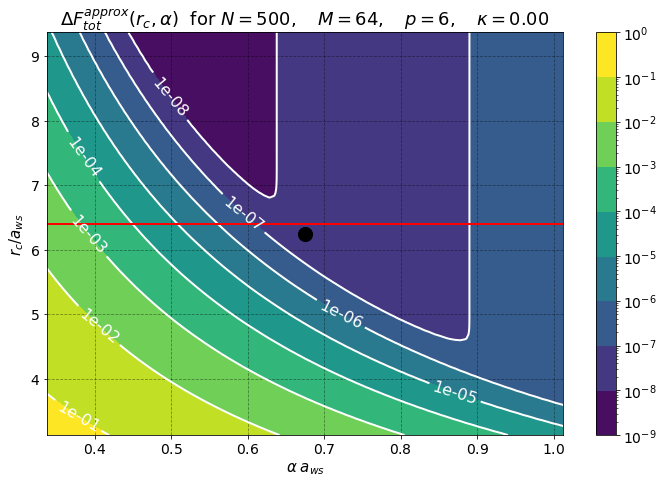

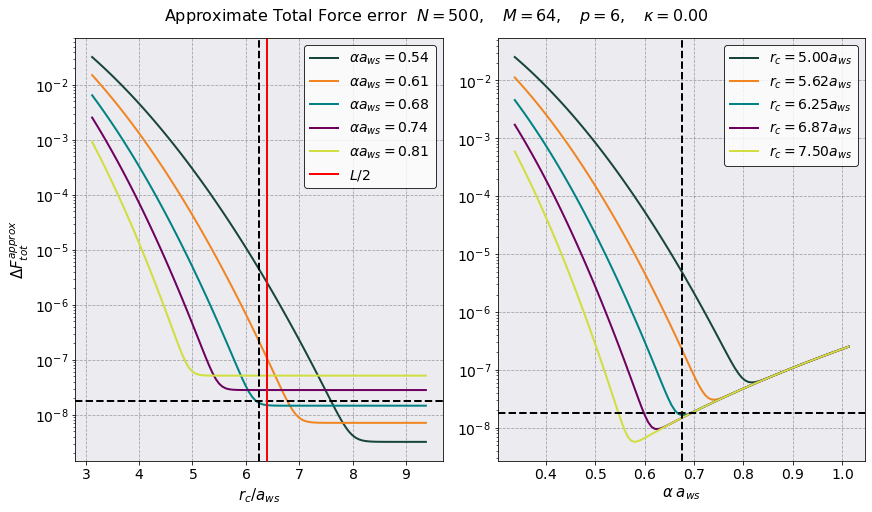

In [2]:
preproc = PreProcess(input_file_name)
preproc.setup(read_yaml=True)
preproc.run(timing=True, loops=100, pppm_plots = True, postprocessing=True)

PreProcessing shows that have chosen good parameters for the pppm algorithm. The black dot in the first plot shows how choice of parameters. This leads to a Total Force Error $\sim 2 \times 10^8$. The horizontal and vertical lines in the above plots represent the value $r = L/2 a_{\rm ws}$. 

We confirm that our choice of parameters leads to the same physical system as the one simulated by Bernu. $\Gamma = 100$, $\beta = 1.0$. Contrarily to Bernu we choose to run our simulation for a much longer time. 
This is for no particular reason, we just can. 

A common technique used in magnetized MD is to equilibrate the system in two steps. First without the presence of the magnetic field and then with the magnetic field turned on. This is because, the magnetic field can greatly delay the relaxation to equilibrium see :cite:`Ott2017`. Hence the magnetization phase before the production phase.

The estimated times, on this machine, are 

    ----------------- Total Estimated Times -----------------------

    Equilibration Time: 0 hrs 3 min 19 sec

    Magnetization Time: 0 hrs 17 min 54 sec

    Production Time: 0 hrs 30 min 14 sec

    Total Run Time: 0 hrs 51 min 28 sec

We are ready to start the simulation.

## Simulation

In [3]:
sim = Simulation(input_file_name)
sim.setup(read_yaml=True)
sim.run()







 __            _             
/ _\ __ _ _ __| | ____ _ ___ 
\ \ / _` | '__| |/ / _` / __|
_\ \ (_| | |  |   < (_| \__ \
\__/\__,_|_|  |_|\_\__,_|___/
                             


An open-source pure-python molecular dynamics code for non-ideal plasmas.



======================= Simulation ==========================

Job ID:  ocp_mag
Job directory:  Simulations/ocp_mag
Equilibration dumps directory:  Simulations/ocp_mag/Equilibration/dumps
Production dumps directory:  Simulations/ocp_mag/Production/dumps

Units:  mks
Total No. of particles =  500

Particle Species:
No. of species =  1
Species 1 : H
	Species ID: 0
	No. of particles = 500 
	Number density = 1.620000e+30 [N/m^3]
	Mass = 1.673000e-27 [kg]
	Charge = 1.602177e-19 [C]
	Temperature = 3.163589e+03 [K]

Lengths scales:
Wigner-Seitz radius = 5.282005e-11 [m]
No. of non-zero box dimensions =  3
Box length along x axis = 1.279439e+01 a_ws = 6.758002e-10 [m]
Box length along y axis = 1.279439e+01 a_ws = 6.758002e-10 [m]
Box



Equilibration Time: 0 hrs 2 min 24 sec

------------- Magnetization -------------




Magnetization Time: 0 hrs 14 min 46 sec

------------- Production -------------




Production Time: 0 hrs 25 min 39 sec

Total Time: 0 hrs 42 min 53 sec


The run completed in a time faster than the predicted one. Woohoo!

## PostProcessing

In [2]:
postproc = PostProcess(input_file_name)
postproc.setup(read_yaml=True)

postproc.therm.setup(postproc.parameters)

Before proceeding to the calculation of the diffusion coefficient we check for conservation of energy during the production phase. 

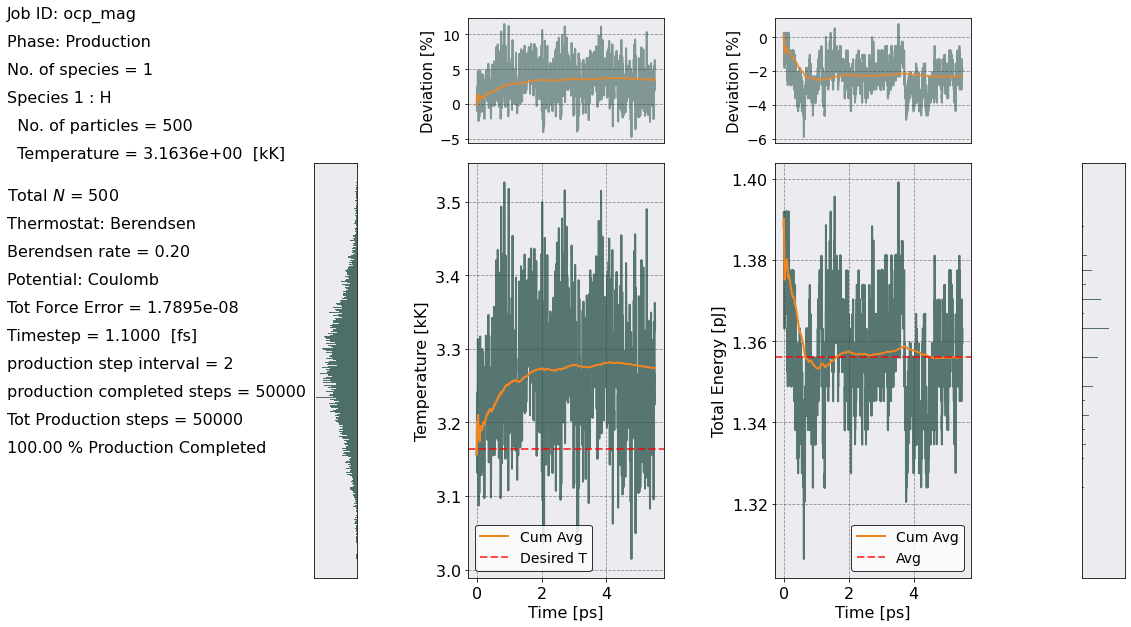

In [3]:
postproc.therm.temp_energy_plot(postproc, 'production')

The energy remained fairly constant over the entire production phase after an initial drop of $\sim 2 \%$. The Temperature similarly had a jump of $\sim 5\%$. However, both the Temperature and Total Energy show a Gaussian distribution around their means.

We are ready to calculate the diffusion coefficient

### Transport

Transport coefficient are calculated using the `TransportCoefficient` class in `sarkas.tools.transport`. Once the class is imported the diffusion coefficient is calculated by calling the method `diffusion`. This method requires the parameters of the simulation passed as `postproc.parameters`. The `phase` argument in this case is not needed since `production` is the default phase. 

In [5]:
from sarkas.tools.transport import TransportCoefficient

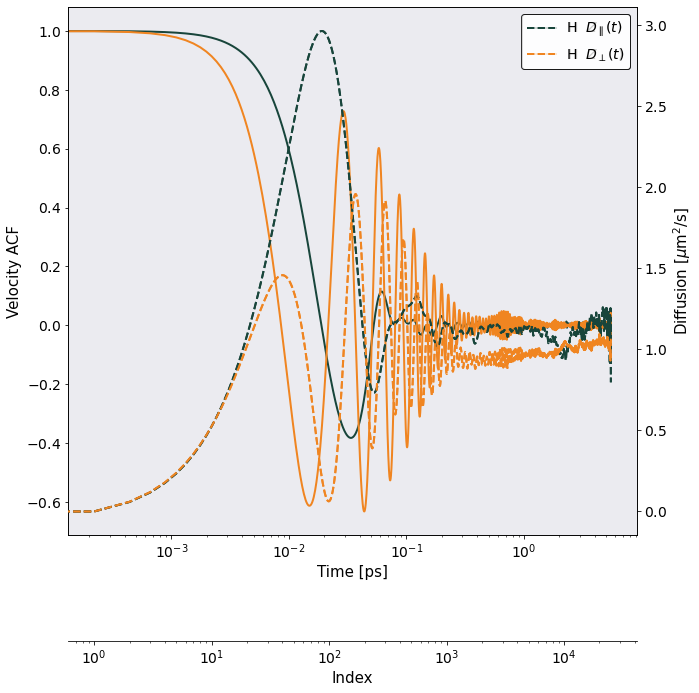

In [6]:
diffusion = TransportCoefficient.diffusion(postproc.parameters, phase = 'production')

This method calculates the diffusion coefficient from the velocity auto-correlation functions. If these functions are not available `Sarkas` will automatically calculate them, hence the `File not found` message at the beginning. 

In the case of a magnetized plasma we have two diffusion coefficients:

$$ 
D_{\parallel}(\tau) = \frac{k_B T}{m} \int_0^\tau dt Z_{\parallel}(t), \quad D_{\perp}(\tau) = \frac{k_B T}{m} \int_0^\tau dt Z_{\perp}(t)
$$

where, for the case of a constant magnetic field in the $z$-direction

$$ 
Z_{\parallel}(t) = \langle v_z(t)v_z(0) \rangle, \quad Z_{\perp}(t) = \frac{1}{2} \left [ \langle v_x(t)v_x(0) \rangle + \langle v_y(t)v_y(0) \rangle \right ],
$$

are the velocity autocorrelation functions. These functions are calculated by the class `VelocityAutocorrelationFunction` in `sarkas.tools.observables`. This class calculates and saves $Z(t)$ for each axis and the total $Z(t) = \frac{1}{3} \left [ Z_x(t) + Z_y(t) + Z_z(t) \right ]$. The `diffusion` method takes care in dividing it into the perpendicular and parallel. 

It is important to note that the `diffusion` method assume a constant magnetic field in the $z$-direction. Arbitrary directions of the magnetic field are not supported at the moment. 

Once the calculation is complete `Sarkas` will produce a figure containing a plot of $Z_{\perp}(t)$ and $Z_{\parallel}(t)$ on the left `y` axis and a plot of $D_{\parallel}(\tau)$ and $D_{\perp}(\tau)$ on the right $y$-axis. $Z_{\parallel, \perp}(t)$ are plotted with solid lines, while $D_{\parallel, \perp}(\tau)$ are plotted as dashed lines. 

The above plots can be confusing and definitely not suitable for publication. Therefore, we re-plot the diffusion only by rescaling it by $\omega_p a_{\rm ws}^2$.

Text(0, 0.5, '$D_{\\parallel,\\perp}$ [$\\omega_p a_{ws}^2$]')

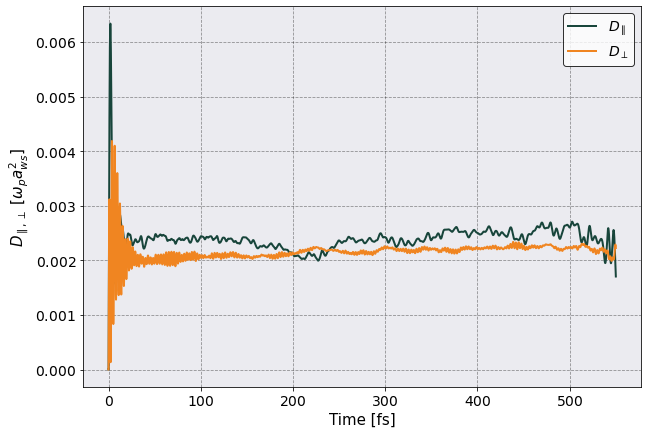

In [10]:
rescaling = postproc.parameters.total_plasma_frequency * postproc.parameters.a_ws**2
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.plot(diffusion["Time"]*1e15, diffusion["H Parallel Diffusion"]/rescaling,
       label = r'$D_{\parallel}$')
ax.plot(diffusion["Time"]*1e15, diffusion["H Perpendicular Diffusion"]/rescaling,
        label = r'$D_{\perp}$')
ax.legend()
ax.set_xlabel('Time [fs]')
ax.set_ylabel(r'$D_{\parallel,\perp}$ [$\omega_p a_{ws}^2$]')

This gives a clearer picture of the diffusion coefficient. Note that the diffusion is a constant and not a function of time. This plot is meant to show how the diffusion changes as the upper limit of the time integration is varied. This plot shows that we need to integrate for a time $\tau > 200$ fs in order to obtain a good value. The shifted $x$-axis `Index` in the previous plot indicates the corresponding array index of time $t$.